In [6]:
import numpy as np
import networkx as nx

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax):

    M = np.shape(E)[0]
    n = np.random.poisson(lam = Tmax*(N+b*M))
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    X = [2**i for i in range(N)][::-1]

    pmixing = False

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)
                
            counts.increment(X[i], -1)

            X[i] = 0

            counts.increment(0, 1)

        else:

            i,j = E[np.random.randint(M)]
                    
            new = X[i] | X[j]
            counts.increment(X[i], -1)
            counts.increment(X[j], -1)
            counts.increment(new, 2)
            X[i] = X[j] = new
                
        R[t] = len(counts) - (0 in counts)

        if (pmixing == False) and (R[t] == 1):
            pmixing = times[t]
        
        if pmixing != False:
            if (R[t] == 0) or (times[t] > 4 * pmixing):
                times = times[:t]
                R = R[:t]
                break

    return times, R, counts.largest_non_zero, pmixing


N = 20
d = 3
G = nx.random_regular_graph(d, N)
E = list(G.edges)
Tmax = 1e3
num_trials = 10

b = np.linspace(0.002, 5, 2)
s1starvar = []
s1starav = []
pmixinglist = []
for i in range(len(b)):
    s1 = []
    pm = []
    for j in range(num_trials):
        times, R, spatial, pmixing = find_tranformation_matrix(b[i], E, N, Tmax)
        s1.append(spatial)
        pm.append(pmixing)
    s1starav.append(np.mean(s1))
    s1starvar.append(np.var(s1))
    pmixinglist.append(np.mean(pm))
print(s1starav)
print(s1starvar)
print(pmixinglist)

[1.0, 20.0]
[0.0, 0.0]
[2.4595702545504805, 1.035489613470053]


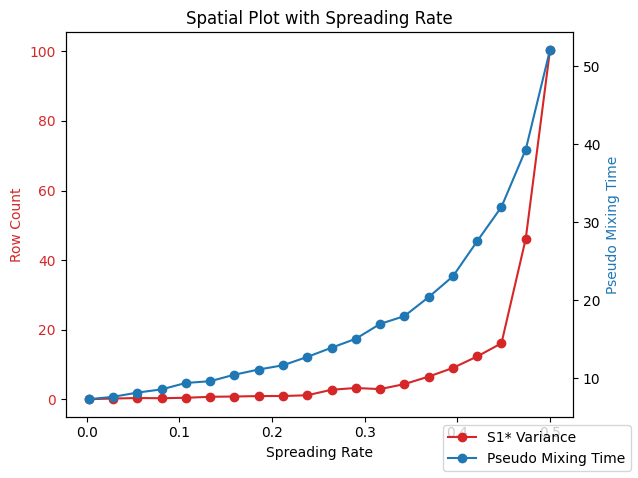

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Row Count', color=color)
ax1.plot(b, s1starvar, color=color, marker = 'o', label= 'S1* Variance')
# color = 'tab:pink'
# ax1.plot(b, s1std, color=color, marker = 'o', label= 'S1* Standard Deviation')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(b, pmixinglist, color=color, marker = 'o', label= 'Pseudo Mixing Time')
ax2.set_ylabel('Pseudo Mixing Time', color=color)


fig.legend(loc = 'lower right')
plt.title('Spatial Plot with Spreading Rate')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
